## Protein Folding Model in Qiskit

Import protein folding classes from the Qiskit Research repository <br>

  <li><b>Protein Folding Problem:</b> based on the IBM NPJ paper </li> <br>
<i>needs:</i> <br>
<ul>
  <li><b>Peptide:</b> the amino acid sequence for the main chain and for side chains (<i>optional </i>) </li>
  <li><b>Amino Acid Interaction,</b> <i>some choices are</i><b>:</b> </li>
  <ul>
    <li>random </li> 
    <li>Miyazawa-Jernigan </li>
  </ul>    
</ul>
<i>can specify:</i> <br>
<ul>
    <li><b>Penalty Parameters,</b> <i>such as </i><b>:</b> </li>
    <ul> 
        <li>Folding Back on Itself</li>
        <li>Chiralty</li>
        <li>Other</li>
    </ul>    
</ul>
<br>

The <b> ProteinFoldingProblem </b> class has a method, qubit_op() which returns a Hamiltonian decomposed into a sum of Pauli operations which can be used by the VQE algorithm. 

<br>


In [9]:
from qiskit_research.protein_folding.protein_folding_problem import (
    ProteinFoldingProblem,
)
from qiskit_research.protein_folding.peptide.peptide import Peptide

from qiskit_research.protein_folding.interactions.random_interaction import (
    RandomInteraction,
)
from qiskit_research.protein_folding.interactions.miyazawa_jernigan_interaction import (
    MiyazawaJerniganInteraction,
)
from qiskit_research.protein_folding.penalty_parameters import PenaltyParameters

from qiskit.utils import algorithm_globals, QuantumInstance

algorithm_globals.random_seed = 23

In [79]:
# main_chain = "APRLRFY"
main_chain = "APRLRFY"
main_chain_len = len(main_chain)
side_chains = [""] * main_chain_len
random_interaction = RandomInteraction()
mj_interaction = MiyazawaJerniganInteraction()
penalty_back = 10
penalty_chiral = 10
penalty_1 = 10
penalty_terms = PenaltyParameters(penalty_chiral, penalty_back, penalty_1)
peptide = Peptide(main_chain, side_chains)
protein_folding_problem = ProteinFoldingProblem(peptide, mj_interaction, penalty_terms)
qubit_op = protein_folding_problem.qubit_op()
print(qubit_op)
x = 2**qubit_op.num_qubits
print("qubit_op size:", x, "x", x)

1613.5895000000003 * IIIIIIIII
+ 487.5 * IIIIIIZII
- 192.5 * IIIIIIIZZ
+ 192.5 * IIIIIIZZZ
- 195.0 * IIIIZIZII
- 195.0 * IIIIIZIZI
- 195.0 * IIIIZZZZI
- 95.0 * IIZIZIIII
- 95.0 * IIIZIZIII
- 95.0 * IIZZZZIII
+ 295.0 * IIIIIIZZI
- 497.5 * IIIIZIIII
- 300.0 * IIIIZZIII
+ 195.0 * IIIIIIIIZ
+ 197.5 * IIIIIZIIZ
- 197.5 * IIIIZZIIZ
- 904.2875 * IZIIIIIII
- 295.0 * IZIIIIZII
- 197.5 * IZIIIIZZI
+ 302.5 * IZIIZIIII
+ 202.5 * IZIIZZIII
+ 100.0 * IZIIZIZII
+ 100.0 * IZIIIZIZI
+ 100.0 * IZIIZZZZI
- 200.0 * IZIIIIIIZ
+ 97.5 * IZIIIIIZZ
- 97.5 * IZIIIIZZZ
- 100.0 * IZIIIZIIZ
+ 100.0 * IZIIZZIIZ
+ 100.0 * IIIIIIIZI
- 100.0 * IIIIIZIII
+ 2.5 * IZIIIIIZI
- 2.5 * IZIIIZIII
+ 192.5 * IIZIIIIII
+ 95.0 * IIZZIIIII
+ 97.5 * IIZIIIZII
+ 97.5 * IIIZIIIZI
+ 97.5 * IIZZIIZZI
- 97.5 * IIIZIIIIZ
+ 97.5 * IIZZIIIIZ
+ 7.5 * IZZIIIIII
+ 5.0 * IZZZIIIII
+ 2.5 * IZZIIIZII
+ 2.5 * IZIZIIIZI
+ 2.5 * IZZZIIZZI
- 2.5 * IZZIZIIII
- 2.5 * IZIZIZIII
- 2.5 * IZZZZZIII
- 2.5 * IZIZIIIIZ
+ 2.5 * IZZZIIIIZ
+ 105.0 * IIIZIIIII
-

In [85]:
qubit_op_matrix = qubit_op.to_matrix()
qc_qubit_op = QuantumCircuit(9)
qc_qubit_op.unitary(qubit_op_matrix, [0,1,2,3,4,5,6,7,8])
print(type(qc_qubit_op))

ExtensionError: 'Input matrix is not unitary.'

In [87]:
main_chain = "YPYFI"
main_chain_len = len(main_chain)
side_chains = [""] * main_chain_len
random_interaction = RandomInteraction()
mj_interaction = MiyazawaJerniganInteraction()
penalty_back = 10
penalty_chiral = 10
penalty_1 = 10
penalty_terms = PenaltyParameters(penalty_chiral, penalty_back, penalty_1)
peptide = Peptide(main_chain, side_chains)
protein_folding_problem = ProteinFoldingProblem(peptide, mj_interaction, penalty_terms)
qubit_op = protein_folding_problem.qubit_op()
print(qubit_op)
x = 2**qubit_op.num_qubits
print("qubit_op size:", x, "x", x)

2.5 * III
- 2.5 * ZII
+ 2.5 * IZZ
- 2.5 * ZZZ
qubit_op size: 8 x 8


In [88]:
operator = qubit_op.to_matrix()
print(type(operator))
print(operator.shape)
operator

<class 'numpy.ndarray'>
(8, 8)


array([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, 10.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        10.+0.j]])

In [89]:
qubit_op.to_pauli_op()

SummedOp([PauliOp(Pauli('III'), coeff=2.5), PauliOp(Pauli('ZII'), coeff=-2.5), PauliOp(Pauli('IZZ'), coeff=2.5), PauliOp(Pauli('ZZZ'), coeff=-2.5)], coeff=1.0, abelian=False)

In [90]:
qc_qubit_op = QuantumCircuit(3)
qc_qubit_op.unitary(qubit_op_matrix, [0,1,2])
print(type(qc_qubit_op))

ExtensionError: 'Input matrix is not unitary.'

In [93]:
# qiskit_research tutorial chain
# main_chain = "APRLRFY" 
# fractal analytics Alzheimer's enzyme related chain
main_chain = "YPYFIP"
main_chain_len = len(main_chain)
print("main_chain_len", main_chain_len)

main_chain_len 6


In [94]:
side_chains = [""] * main_chain_len

In [95]:
random_interaction = RandomInteraction()
mj_interaction = MiyazawaJerniganInteraction()

In [96]:
penalty_back = 10
penalty_chiral = 10
penalty_1 = 10

penalty_terms = PenaltyParameters(penalty_chiral, penalty_back, penalty_1)

In [97]:
peptide = Peptide(main_chain, side_chains)

In [98]:
protein_folding_problem = ProteinFoldingProblem(peptide, mj_interaction, penalty_terms)
qubit_op = protein_folding_problem.qubit_op()

In [99]:
print(qubit_op)

929.4905 * IIIIII
+ 300.0 * IIIZII
- 97.5 * IIIIZZ
+ 97.5 * IIIZZZ
- 100.0 * IZIZII
- 100.0 * IIZIZI
- 100.0 * IZZZZI
+ 202.5 * IIIZZI
- 310.0 * IZIIII
- 207.5 * IZZIII
+ 205.0 * IIIIIZ
+ 102.5 * IIZIIZ
- 102.5 * IZZIIZ
- 924.4905 * ZIIIII
- 302.5 * ZIIZII
- 202.5 * ZIIZZI
+ 310.0 * ZZIIII
+ 207.5 * ZZZIII
+ 102.5 * ZZIZII
+ 102.5 * ZIZIZI
+ 102.5 * ZZZZZI
- 205.0 * ZIIIIZ
+ 100.0 * ZIIIZZ
- 100.0 * ZIIZZZ
- 102.5 * ZIZIIZ
+ 102.5 * ZZZIIZ
- 2.5 * IIIIZI
+ 2.5 * IIZIII
+ 2.5 * ZIIIZI
- 2.5 * ZIZIII


In [100]:
qubit_op.settings

{'primitive': SparsePauliOp(['IIIIII', 'IIIZII', 'IIIIZZ', 'IIIZZZ', 'IZIZII', 'IIZIZI', 'IZZZZI', 'IIIZZI', 'IZIIII', 'IZZIII', 'IIIIIZ', 'IIZIIZ', 'IZZIIZ', 'ZIIIII', 'ZIIZII', 'ZIIZZI', 'ZZIIII', 'ZZZIII', 'ZZIZII', 'ZIZIZI', 'ZZZZZI', 'ZIIIIZ', 'ZIIIZZ', 'ZIIZZZ', 'ZIZIIZ', 'ZZZIIZ', 'IIIIZI', 'IIZIII', 'ZIIIZI', 'ZIZIII'],
               coeffs=[ 929.4905+0.j,  300.    +0.j,  -97.5   +0.j,   97.5   +0.j, -100.    +0.j,
  -100.    +0.j, -100.    +0.j,  202.5   +0.j, -310.    +0.j, -207.5   +0.j,
   205.    +0.j,  102.5   +0.j, -102.5   +0.j, -924.4905+0.j, -302.5   +0.j,
  -202.5   +0.j,  310.    +0.j,  207.5   +0.j,  102.5   +0.j,  102.5   +0.j,
   102.5   +0.j, -205.    +0.j,  100.    +0.j, -100.    +0.j, -102.5   +0.j,
   102.5   +0.j,   -2.5   +0.j,    2.5   +0.j,    2.5   +0.j,   -2.5   +0.j]),
 'coeff': 1.0,
 'grouping_type': 'None'}

In [101]:
qubit_op.num_qubits

6

In [102]:
operator = qubit_op.to_matrix()
print(type(operator))
print(operator.shape)

<class 'numpy.ndarray'>
(64, 64)


In [103]:
operator[1,1]

(9.999999999999886+0j)

In [104]:
operator

array([[ 1.00000000e+01+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  1.00000000e+01+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j, -1.13686838e-13+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       ...,
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  1.63898100e+03+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j,  1.64898100e+03+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         8.58981000e+02+0.j]])

In [105]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE
from qiskit import execute, Aer
from qiskit.primitives import Sampler

# set classical optimizer
optimizer = COBYLA(maxiter=50)

# set variational ansatz
ansatz = RealAmplitudes(reps=1)

counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


# initialize VQE using CVaR with alpha = 0.1
vqe = SamplingVQE(
    Sampler(),
    ansatz=ansatz,
    optimizer=optimizer,
    aggregation=0.1,
    callback=store_intermediate_result,
)

raw_result = vqe.compute_minimum_eigenvalue(qubit_op)
print(raw_result)

SamplingMinimumEigensolverResult:
	Eigenvalue: -1.0190000000001191
	Best measurement
: {'state': 37, 'bitstring': '100101', 'value': (-1.0190000000001191+0j), 'probability': 0.4672198718418707}



In [108]:
from qiskit.algorithms.minimum_eigensolvers import QAOA

In [112]:
qaoa = QAOA(Sampler(), optimizer=optimizer, reps=10, initial_state=None, mixer=None, initial_point=None, aggregation=0.1, callback=store_intermediate_result)
raw_result = qaoa.compute_minimum_eigenvalue(qubit_op)
print(raw_result)

SamplingMinimumEigensolverResult:
	Eigenvalue: -0.41062537953987066
	Best measurement
: {'state': 37, 'bitstring': '100101', 'value': (-1.0190000000001191+0j), 'probability': 0.0402968969126354}



C:\Users\nat\miniconda3\envs\qa2_py39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\nat\miniconda3\envs\qa2_py39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


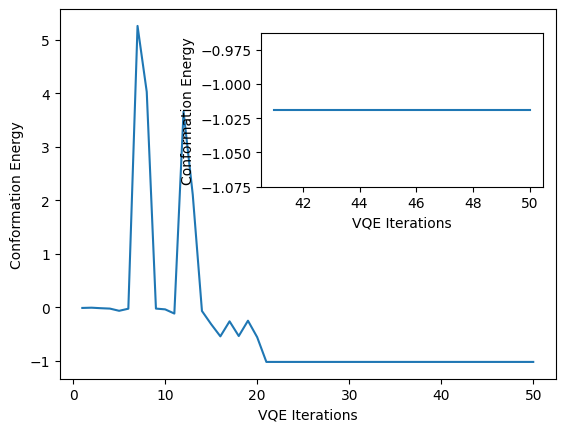

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(counts, values)
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")

fig.add_axes([0.44, 0.51, 0.44, 0.32])

plt.plot(counts[40:], values[40:])
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")
plt.show()

In [36]:
result = protein_folding_problem.interpret(raw_result=raw_result)
print(
    "The bitstring representing the shape of the protein during optimization is: ",
    result.turn_sequence,
)
print("The expanded expression is:", result.get_result_binary_vector())

The bitstring representing the shape of the protein during optimization is:  111011
The expanded expression is: 1__________________________________________________________________________________________1101_1____


In [37]:
print(
    f"The folded protein's main sequence of turns is: {result.protein_shape_decoder.main_turns}"
)
print(f"and the side turn sequences are: {result.protein_shape_decoder.side_turns}")

The folded protein's main sequence of turns is: [1, 0, 3, 2, 3]
and the side turn sequences are: [None, None, None, None, None, None]


In [38]:
print(result.protein_shape_file_gen.get_xyz_data())

[['Y' '0.0' '0.0' '0.0']
 ['P' '0.5773502691896258' '0.5773502691896258' '-0.5773502691896258']
 ['Y' '1.1547005383792517' '0.0' '-1.1547005383792517']
 ['F' '1.7320508075688776' '-0.5773502691896258' '-0.5773502691896258']
 ['I' '2.3094010767585034' '0.0' '0.0']
 ['P' '2.886751345948129' '-0.5773502691896258' '0.5773502691896258']]


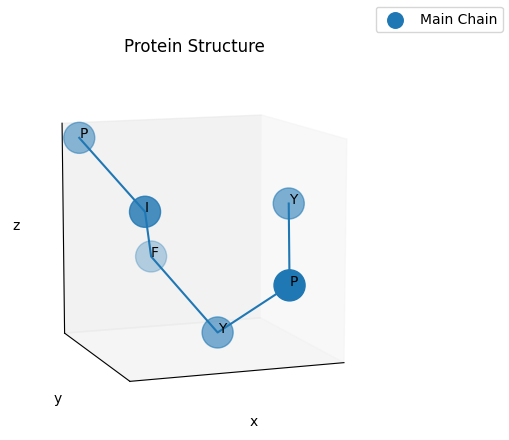

In [39]:
fig = result.get_figure(title="Protein Structure", ticks=False, grid=True)
fig.get_axes()[0].view_init(10, 70)

# IQPE Approach 


In [40]:
from qiskit import QuantumCircuit
from qiskit.algorithms import IterativePhaseEstimation

In [41]:
# ?IterativePhaseEstimation

In [42]:
# Sampler

In [43]:
num_iterations = 3
quantum_instance = None
qc = QuantumCircuit()
sampler = Sampler()
ipe = IterativePhaseEstimation(num_iterations, quantum_instance, sampler)

In [47]:
print(type(qubit_op))
qubit_op_matrix = qubit_op.to_matrix()
print(type(qubit_op_matrix))
print(qubit_op_matrix.shape)
# print(qubit_op_matrix)
print(type(ansatz))
print("ansatz num qubits:", ansatz.num_qubits)
print("ansatz num ancillas:", ansatz.num_ancillas)
print("ansatz num cl bits:", ansatz.num_clbits)

<class 'qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp'>
<class 'numpy.ndarray'>
(64, 64)
<class 'qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes'>
ansatz num qubits: 6
ansatz num ancillas: 0
ansatz num cl bits: 6


In [51]:
qc_qubit_op = QuantumCircuit(6)
qc_qubit_op.unitary(qubit_op_matrix, [0,1,2,3,4,5])
print(type(qc_qubit_op))

ExtensionError: 'Input matrix is not unitary.'

In [48]:
result = ipe.estimate(qc_qubit_op, ansatz)
result

AttributeError: 'numpy.ndarray' object has no attribute 'num_qubits'

## VQE From Scratch Example 

U = [1  0  0  0  <br>
     0  0 -1  0  <br>
     0 -1  0  0  <br>
     0  0  0  1] <br>


Decompose U: <br>

U = 1/2*(I1I2 + Z1Z2) - 1/2*(X1X2 + Y1Y2) <br>

U * Ut = I, ==> U is unitary
     

In [1]:
from qiskit.opflow.primitive_ops import PauliSumOp
paulis  =  ['II', 'ZZ', 'XX', 'YY']
weights  =  [1/2, 1/2, -1/2, -1/2]
pauli_op = [([pauli,weight]) for pauli, weight in zip(paulis, weights)]
hamiltonian = PauliSumOp.from_list([ op for op in pauli_op ])

In [3]:
# Hamiltonian is a PauliSumOp
hamiltonian

PauliSumOp(SparsePauliOp(['II', 'ZZ', 'XX', 'YY'],
              coeffs=[ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j]), coeff=1.0)

In [57]:
# Return to the original matrix that we decomposed
op_matrix = hamiltonian.to_matrix()
print(op_matrix.shape)
print(op_matrix)

(4, 4)
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


In [59]:
qc = QuantumCircuit(2)
qc.unitary(op_matrix, [0,1])
print(type(qc))

<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
